In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import thư viện

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
from torchvision import datasets, transforms
import torchvision.models as models
import torchvision
from torchsummary import summary
import os
from PIL import Image
import cv2
import glob
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score

In [50]:
path = '/content/drive/MyDrive/Co_che_ma_doc/datasets_DetectingMalwareUsingAHybridApproach-1/'

In [51]:
# load dl
df1 = pd.read_csv(path + 'staDynBenignLab.csv')
df2 = pd.read_csv(path + 'staDynVt2955Lab.csv')

In [52]:
# gom dữ liệu
from keras.models import load_model

df = pd.concat([df1, df2], ignore_index=True, axis=0).fillna(0)

In [53]:
df = df.iloc[:,2:]

In [54]:
X = df.drop('label', axis=1)
y = df['label']

# Supervised

### Tiền xử lý

In [55]:
# Normalize dữ liệu
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [56]:
# Split into train and test sets
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Xây mô hình

### decision tree


In [10]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

# instantiate
tree = DecisionTreeClassifier(max_depth = 5)
# fit 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [11]:
X_train.shape

(2840, 1086)

In [12]:
#predicting 
y_test_tree = tree.predict(x_test)
y_train_tree = tree.predict(X_train)

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#computing the accuracy
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

# Compute the precision
precision_train_tree = precision_score(y_train, y_train_tree)
precision_test_tree = precision_score(y_test, y_test_tree)

# Compute the recall
recall_train_tree = recall_score(y_train, y_train_tree)
recall_test_tree = recall_score(y_test, y_test_tree)

# Compute the F1 score
f1_train_tree = f1_score(y_train, y_train_tree)
f1_test_tree = f1_score(y_test, y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))
print("Decision Tree: precision on training Data: {:.3f}".format(precision_train_tree))
print("Decision Tree: precision on test Data: {:.3f}".format(precision_test_tree))
print("Decision Tree: recall on training Data: {:.3f}".format(recall_train_tree))
print("Decision Tree: recall on test Data: {:.3f}".format(acc_test_tree))
print("Decision Tree: f1 on training Data: {:.3f}".format(f1_train_tree))
print("Decision Tree: f1 on test Data: {:.3f}".format(f1_test_tree ))

Decision Tree: Accuracy on training Data: 0.991
Decision Tree: Accuracy on test Data: 0.983
Decision Tree: precision on training Data: 0.999
Decision Tree: precision on test Data: 0.995
Decision Tree: recall on training Data: 0.990
Decision Tree: recall on test Data: 0.983
Decision Tree: f1 on training Data: 0.995
Decision Tree: f1 on test Data: 0.989


### CNN

In [69]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
def Model(X_train):
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    input = tf.keras.layers.Input(shape=X_train[0].shape)
    x = tf.keras.layers.Conv1D(32, 2, activation='relu')(input)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.MaxPooling1D(2)(x)
    x = tf.keras.layers.Conv1D(64, 2, activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.MaxPooling1D(2)(x)
    x = tf.keras.layers.Conv1D(128, 2, activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.MaxPooling1D(2)(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    output = tf.keras.layers.Dense(2, activation='softmax')(x)
    model = tf.keras.models.Model(inputs=[input], outputs=[output])
    return model

In [70]:
model = Model(X_train)
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
89/89 [==============================] - 17s 165ms/step - loss: 0.7866 - accuracy: 0.8975 - val_loss: 0.5832 - val_accuracy: 0.7958
Epoch 2/10
89/89 [==============================] - 14s 159ms/step - loss: 0.0802 - accuracy: 0.9701 - val_loss: 0.4805 - val_accuracy: 0.7958
Epoch 3/10
89/89 [==============================] - 14s 160ms/step - loss: 0.0666 - accuracy: 0.9750 - val_loss: 0.4260 - val_accuracy: 0.7958
Epoch 4/10
89/89 [==============================] - 14s 160ms/step - loss: 0.0652 - accuracy: 0.9754 - val_loss: 0.3995 - val_accuracy: 0.9394
Epoch 5/10
89/89 [==============================] - 14s 161ms/step - loss: 0.0546 - accuracy: 0.9813 - val_loss: 0.2286 - val_accuracy: 0.9493
Epoch 6/10
89/89 [==============================] - 14s 160ms/step - loss: 0.0521 - accuracy: 0.9778 - val_loss: 0.1496 - val_accuracy: 0.9493
Epoch 7/10
89/89 [==============================] - 14s 161ms/step - loss: 0.0459 - accuracy: 0.9831 - val_loss: 0.1957 - val_accuracy: 0.9479

In [66]:
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = model.predict(x_test)
#y_pred = (y_pred > 0.5).astype(int)  
# Convert probabilities to binary predictions
y_pred = np.argmax(y_pred, axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  # Use 'macro' averaging
recall = recall_score(y_test, y_pred, average='macro')  # Use 'macro' averaging
f1 = f1_score(y_test, y_pred, average='macro')  # Use 'macro' averaging

# Print the metrics
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-Score: ", f1)

23/23 [==============================] - 1s 17ms/step
Accuracy:  0.9154929577464789
Precision:  0.85384849885435
Recall:  0.9392126945376869
F1-Score:  0.8849096567822253


# Unsupervised

### Tiền xử lý

In [39]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [40]:
# Normalize dữ liệu
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

### Xây model

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

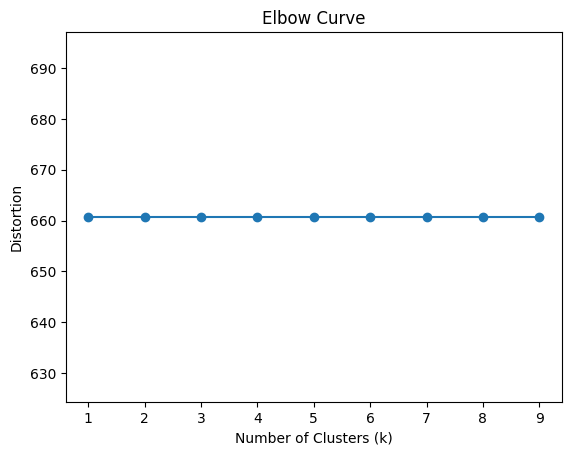

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


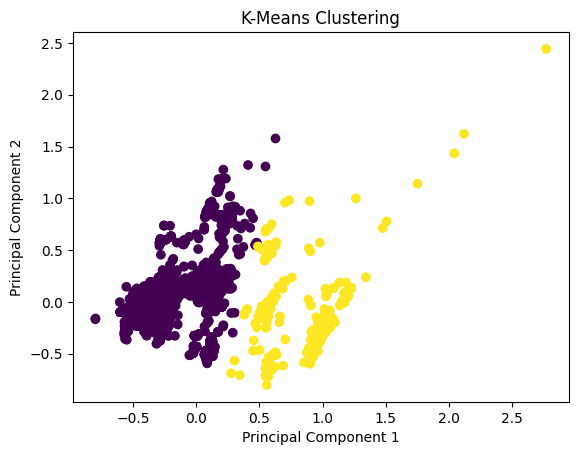

         Virtual  Offset          loc  Import  Imports  var  Forwarder  UINT  \
Cluster                                                                        
0            0.0     0.0   199.623213     0.0      0.0  0.0        0.0   0.0   
1            0.0     0.0  1080.016575     0.0      0.0  0.0        0.0   0.0   

         LONG  BOOL  ...  count_file_deleted  count_file_copied  \
Cluster              ...                                          
0         0.0   0.0  ...            0.048553           0.649152   
1         0.0   0.0  ...            0.162063           1.447514   

         count_file_renamed  count_regkey_written  count_regkey_deleted  \
Cluster                                                                   
0                       0.0              0.791154              0.009977   
1                       0.0              2.360958              0.082873   

         count_file_opened  count_dll_loaded     label  __vbaVarIndexLoad  \
Cluster                         

In [41]:
# Apply dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
# Determine the optimal number of clusters using the elbow method
distortions = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=2, random_state=42)
    kmeans.fit(X_pca)
    distortions.append(kmeans.inertia_)
# Plot the elbow curve
plt.plot(range(1, 10), distortions, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('Elbow Curve')
plt.show()
# Choose the optimal number of clusters and train the k-means model
k = 2  # Example: Choose 3 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_pca)
# Get the predicted cluster labels
labels = kmeans.labels_
# Visualize the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering')
plt.show()

# Interpret the results
df['Cluster'] = labels
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)

In [49]:
labels = kmeans.labels_

# Assign labels to the two clusters based on majority label
cluster_0_label = max(set(labels), key=labels.tolist().count)
cluster_1_label = 1 if cluster_0_label == 0 else 0

# Map the cluster labels to match the available labels
predicted_labels = [cluster_0_label if label == 0 else cluster_1_label for label in labels]


In [48]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

# Calculate anomaly detection metrics
auc_roc = roc_auc_score(y, predicted_labels)
precision = precision_score(y, predicted_labels)
recall = recall_score(y, predicted_labels)
f1 = f1_score(y, predicted_labels)

print("AUC-ROC:", auc_roc)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

AUC-ROC: 0.5858209273557139
Precision: 0.988950276243094
Recall: 0.1817258883248731
F1-score: 0.307032590051458
